# Part II - Ford GoBike System Data Analysis and Recommendations
## by Eng. Raghad Shalabi

## Investigation Overview
The goal of this presentation is to delve deeper into the Ford GoBike dataset to uncover further insights and provide actionable recommendations. We aim to analyze bike usage patterns, build predictive models, and suggest improvements based on the findings from the data. Key insights from the exploratory analysis will guide this investigation.

## Dataset Overview and Executive Summary
The Ford GoBike dataset consists of bike rides across the San Francisco Bay Area, including information on trip duration, start and end stations, user types, and more. The dataset includes:

> 183,412 rows

> 16 columns with features like trip duration, start and end stations, user types, and timestamps.

#### Executive Summary:

> Most trips are short, with a peak in usage during morning and evening rush hours.

> Casual users exhibit more variability in trip duration compared to subscribers.

> Weekend trips are generally longer, especially for casual users.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Describe the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
# Check the shape of the dataframe
df.shape

(183412, 16)

In [5]:
# Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check for duplicated rows
df.duplicated().sum()

0

## Visualization 1: Time Series Analysis of Bike Usage
**Description:** This visualization plots the number of rides per day to reveal trends and patterns in bike usage over time.

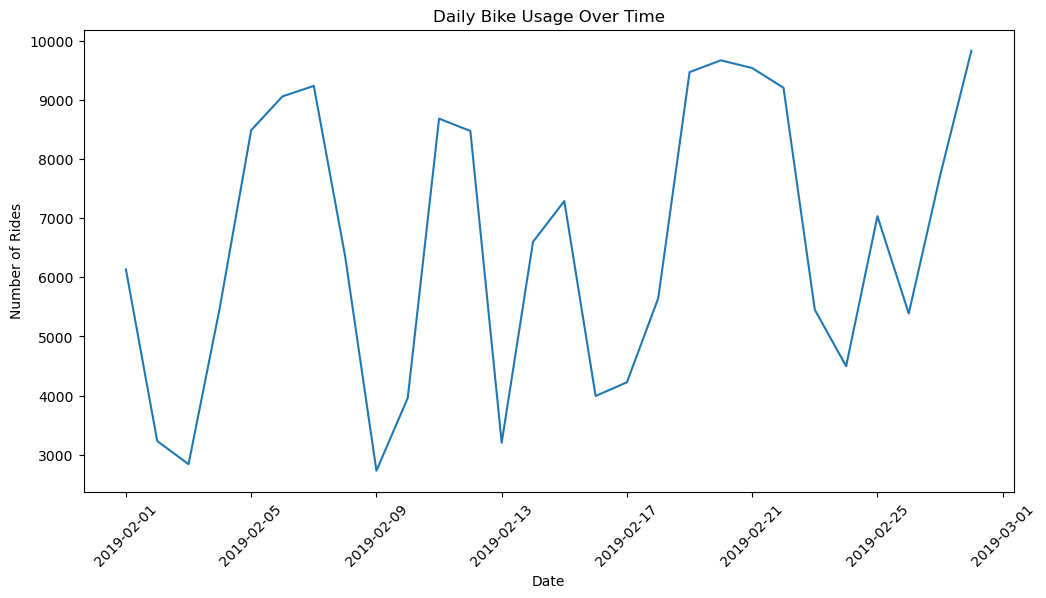

In [7]:
# Convert 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Create a new column for date
df['date'] = df['start_time'].dt.date

# Plot the number of rides per day
plt.figure(figsize=(12, 6))
df.groupby('date').size().plot()
plt.title('Daily Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

**Comment:** The plot illustrates the fluctuations in bike usage over time. Identifying trends can help in planning for peak periods and improving resource allocation.

## Visualization 2: Heatmap of Hourly Usage by Day of the Week
**Description:** This heatmap shows bike usage patterns by hour and day of the week, helping to identify peak and off-peak times.

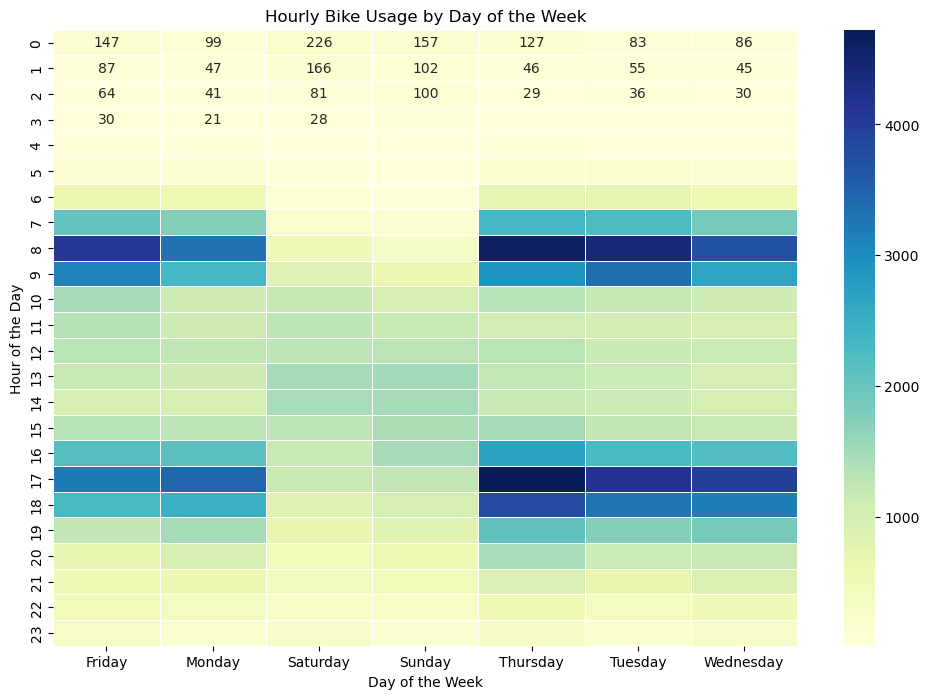

In [8]:
# Ensure 'start_time' is in datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Create 'start_hour' and 'day_of_week' columns
df['start_hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.day_name()

# Create a pivot table for hourly usage by day of the week
usage_heatmap = df.pivot_table(index='start_hour', columns='day_of_week', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(usage_heatmap, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Hourly Bike Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

**Comment:** This heatmap provides a clear view of how bike usage varies throughout the week, highlighting peak hours and days. It can be used to optimize bike availability and adjust service hours.

## Visualization 3: Trip Duration by User Type and Day of the Week

**Description:** This bar chart compares the average trip duration across different days of the week for both subscriber and customer user types. The goal is to understand how trip duration varies by day and user type.


<Figure size 1000x600 with 0 Axes>

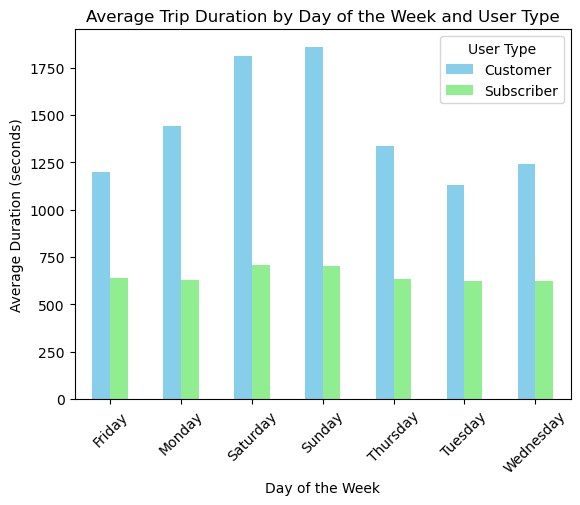

In [9]:
# Calculate average trip duration by day of the week and user type
avg_duration = df.groupby(['day_of_week', 'user_type'])['duration_sec'].mean().unstack()

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_duration.plot(kind='bar', stacked=False, color=['skyblue', 'lightgreen'])
plt.title('Average Trip Duration by Day of the Week and User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()

**Comment:** 
This visualization reveals that casual customers tend to take longer trips, especially on weekends. In contrast, subscribers generally have more consistent and shorter trip durations throughout the week. This insight can inform targeted promotions and service enhancements, such as weekend discounts for casual users or loyalty rewards for frequent subscribers.

## Recommendations
### 1. Optimize Bike Distribution:

   >Increase bike availability during peak hours and reduce it during off-peak times based on the time series analysis and heatmap.

### 2. Promote Off-Peak Usage:

   >Implement promotions or discounts for trips taken during off-peak hours to balance demand.

### 3. Enhance Weekend Services:

   >Given longer trips on weekends, consider increasing bike availability or extending service hours to cater to recreational users.

### 4. Advanced Predictive Modeling:

   >Develop more sophisticated models to dynamically forecast bike demand and optimize distribution based on real-time data.

### 5. User Feedback Analysis:

   >Collect and analyze user feedback to identify and address areas for improvement, enhancing overall satisfaction.